In [1]:
from hiive.mdptoolbox import mdp
from hiive.mdptoolbox.example import forest

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
def plot_graph(param, curves, param_name="", curve_name=""):
    colors = ['deepskyblue', 'red', 'yellow', 'green', 'midnightblue', 'fuchsia']
    plt.figure()
    lines = []
    l, = plt.plot(param, curves, ls='-', marker='+', color='deepskyblue')
    lines.append(l)
    plt.xlabel(param_name)
    plt.ylabel(curve_name)
    
    plt.show()

In [3]:
def plot_graphs(param, curves, curve_labels, param_name="", curve_name=""):
    colors = ['firebrick', 'cadetblue', 'darksalmon', 'mediumseagreen', 'darkmagenta', 'skyblue', 
              'gold','palevioletred', 'olive', 'darkorange', 'mediumpurple', 'slategray', 'darkseagreen']
    plt.figure()
    lines = []
    for i in range(len(curve_labels)):
        l, = plt.plot(param, curves[i,:], ls='-', marker='', color=colors[i])
        lines.append(l)
    plt.xlabel(param_name)
    plt.ylabel(curve_name)
    
    plt.legend(handles=lines, labels=curve_labels, loc='best')
    plt.show()

In [47]:
S = 500
p = 0.05
r1 = 10
r2 = 2

In [57]:
def run_vi(P, R, gamma, epsilon, max_iter):
    vi = mdp.ValueIteration(P, R, gamma=gamma, epsilon=epsilon, max_iter=max_iter)
    vi.max_iter = max_iter
    vi.run()
    return vi

In [94]:
vi_gamma_list = np.arange(0.1, 1.10, 0.1)
vi_max_iteration = 100
vi_epsilon = 0.0001

vi_gamma_conv_iters = []
vi_gamma_threshold = []
vi_gamma_max_value = []
vi_gamma_time_run = []
vi_gamma_V = []
vi_gamma_States = []
vi_gamma_policies = []
vi_gamma_policy_update = []
tot_rewards = np.zeros((len(vi_gamma_list), vi_max_iteration))

step = 0

for i in vi_gamma_list:
    P, R = forest(S=S, p=p, r1=r1, r2=r2)
    
    start_time = time.time()
    vi = run_vi(P, R, gamma=i, epsilon=vi_epsilon, max_iter=vi_max_iteration)
    running_time = time.time() - start_time
    
    vi_gamma_conv_iters.append(vi.iter)
    vi_gamma_threshold.append(vi.thresh)
    vi_gamma_max_value.append(vi.run_stats[-1]['Max V'])
    vi_gamma_time_run.append(running_time)
    
    vi_gamma_V.append(vi.V)
    stats = vi.run_stats
    vi_gamma_States.append(stats)
    vi_gamma_policies.append(vi.policy)
    vi_gamma_policy_update.append(len(vi.run_stats))
    
    for it in range(vi.iter):
        tot_rewards[step, it] = vi.run_stats[it]['Mean V']
    for it in range(vi.iter, vi_max_iteration):
        tot_rewards[step, it] = vi.run_stats[-1]['Mean V']
    
    step += 1

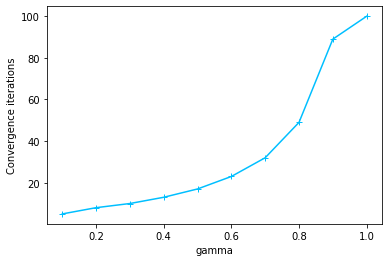

In [95]:
plot_graph(vi_gamma_list, vi_gamma_conv_iters, param_name="gamma", curve_name="Convergence iterations")

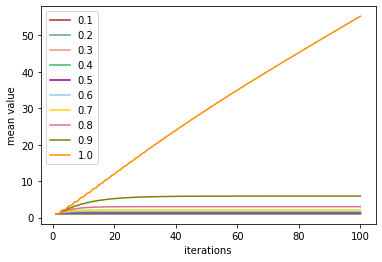

In [96]:
plot_graphs(range(1, vi_max_iteration+1), tot_rewards, 
            ["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9","1.0"], 
            param_name="iterations", curve_name="mean value")

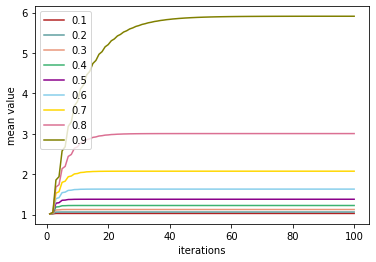

In [97]:
plot_graphs(range(1, vi_max_iteration+1), tot_rewards, 
            ["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9"], 
            param_name="iterations", curve_name="mean value")

In [82]:
vi_eps_list = np.arange(0.0000001, 0.0001, 0.00001)
vi_eps_max_iteration = 100
vi_eps_gamma = 0.9

vi_eps_conv_iters = []
vi_eps_threshold = []
vi_eps_max_value = []
vi_eps_time_run = []
vi_eps_V = []
vi_eps_States = []
vi_eps_policies = []
vi_eps_policy_update = []
vi_eps_tot_rewards = np.zeros((len(vi_eps_list), vi_eps_max_iteration))

step = 0

for i in vi_eps_list:
    P, R = forest(S=S, p=p, r1=r1, r2=r2)
    
    start_time = time.time()
    vi = run_vi(P, R, gamma=vi_eps_gamma, epsilon=i, max_iter=vi_eps_max_iteration)
    running_time = time.time() - start_time
    
    vi_eps_conv_iters.append(vi.iter)
    print(vi.iter)
    vi_eps_threshold.append(vi.thresh)
    vi_eps_max_value.append(vi.run_stats[-1]['Max V'])
    vi_eps_time_run.append(running_time)
    
    vi_eps_V.append(vi.V)
    stats = vi.run_stats
    vi_eps_States.append(stats)
    vi_eps_policies.append(vi.policy)
    vi_eps_policy_update.append(len(vi.run_stats))
    
    for it in range(vi.iter):
        vi_eps_tot_rewards[step, it] = vi.run_stats[it]['Mean V']
    for it in range(vi.iter, vi_max_iteration):
        vi_eps_tot_rewards[step, it] = vi.run_stats[-1]['Mean V']
    step += 1

100
100
99
97
95
93
92
91
90
90


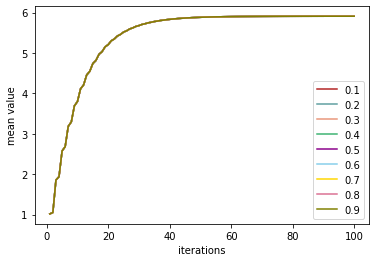

In [83]:
plot_graphs(range(1, vi_eps_max_iteration+1), vi_eps_tot_rewards, 
            ["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9"], 
            param_name="iterations", curve_name="mean value")

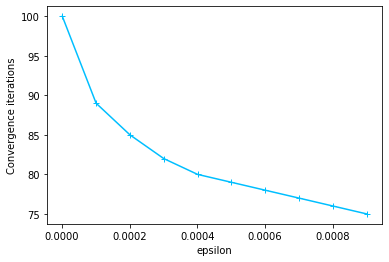

In [67]:
plot_graph(vi_eps_list, vi_eps_conv_iters, param_name="epsilon", curve_name="Convergence iterations")

In [92]:
vi_r1_list = [10, 20, 50, 100, 10, 10, 20, 50, 100, 10]
vi_r2_list = [2, 2, 2, 3, 10, 2, 2, 2, 3, 10]
vi_p_list = [0.1, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01, 0.01]

vi_rew_max_iteration = 100 
vi_rew_gamma = 0.8
vi_rew_epsilon = 0.0001

vi_rew_conv_iters = []
vi_rew_threshold = []
vi_rew_max_value = []
vi_rew_time_run = []
vi_rew_V = []
vi_rew_States = []
vi_rew_policies = []
vi_rew_policy_update = []
vi_rew_tot_rewards = np.zeros((len(vi_r1_list), vi_rew_max_iteration))

step = 0

for i in range(len(vi_r1_list)):
    
    P, R = forest(S=S, p=vi_p_list[i], r1=vi_r1_list[i], r2=vi_r2_list[i])
    
    start_time = time.time()
    vi = run_vi(P, R, gamma=vi_rew_gamma, epsilon=vi_rew_epsilon, max_iter=vi_rew_max_iteration)
    running_time = time.time() - start_time
    
    vi_rew_conv_iters.append(vi.iter)
    vi_rew_time_run.append(running_time)
    
    vi_rew_V.append(vi.V)
    stats = vi.run_stats
    vi_rew_States.append(stats)
    vi_rew_policies.append(vi.policy)
    vi_rew_policy_update.append(len(vi.run_stats))
    
    for it in range(vi.iter):
        vi_rew_tot_rewards[step, it] = vi.run_stats[it]['Mean V']
    for it in range(vi.iter, vi_max_iteration):
        vi_rew_tot_rewards[step, it] = vi.run_stats[-1]['Mean V']
    
    step += 1

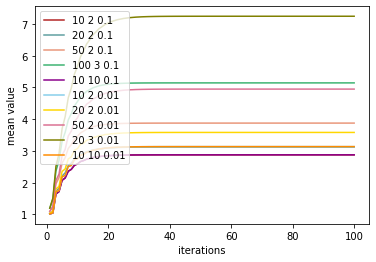

In [93]:
plot_graphs(range(1, vi_rew_max_iteration+1), vi_rew_tot_rewards, 
            ["10 2 0.1","20 2 0.1", "50 2 0.1","100 3 0.1","10 10 0.1",
             "10 2 0.01","20 2 0.01","50 2 0.01","20 3 0.01","10 10 0.01"], 
            param_name="iterations", curve_name="mean value")

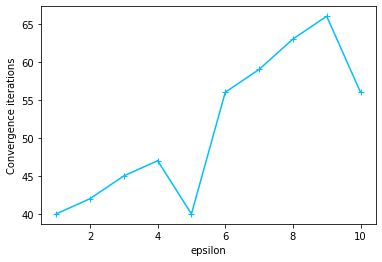

In [85]:
plot_graph(range(1, 11), vi_rew_conv_iters, param_name="epsilon", curve_name="Convergence iterations")

In [17]:
def run_pi(P, R, gamma, max_iter):
    pi = mdp.PolicyIteration(P, R, gamma=gamma, max_iter=max_iter)
    pi.run()
    return pi

In [37]:
pi_gamma_list = np.arange(0.1, 1.00, 0.1)
pi_max_iteration = 30
pi_epsilon = 0.0001

pi_gamma_conv_iters = []
pi_gamma_max_value = []
pi_gamma_time_run = []
pi_gamma_V = []
pi_gamma_States = []
pi_gamma_policies = []
pi_gamma_policy_update = []
pi_g_tot_rewards = np.zeros((len(pi_gamma_list), pi_max_iteration))

step = 0

for i in pi_gamma_list:
    P, R = forest(S=S, p=p, r1=r1, r2=r2)
    
    start_time = time.time()
    pi = run_pi(P, R, gamma=i, max_iter=pi_max_iteration)
    running_time = time.time() - start_time
    
    pi_gamma_conv_iters.append(pi.iter)
    pi_gamma_max_value.append(pi.run_stats[-1]['Max V'])
    pi_gamma_time_run.append(running_time)
    
    pi_gamma_V.append(pi.V)
    stats = pi.run_stats
    pi_gamma_States.append(stats)
    pi_gamma_policies.append(pi.policy)
    pi_gamma_policy_update.append(len(pi.run_stats))
    
    for it in range(pi.iter):
        pi_g_tot_rewards[step, it] = pi.run_stats[it]['Mean V']
    for it in range(pi.iter, pi_max_iteration):
        pi_g_tot_rewards[step, it] = pi.run_stats[-1]['Mean V']
    
    step += 1

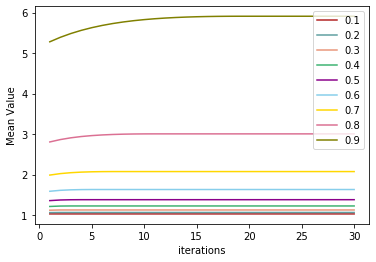

In [38]:
plot_graphs(range(1, pi_max_iteration+1), pi_g_tot_rewards, 
            ["0.1","0.2","0.3","0.4","0.5","0.6","0.7","0.8","0.9"], 
            param_name="iterations", curve_name="Mean Value")

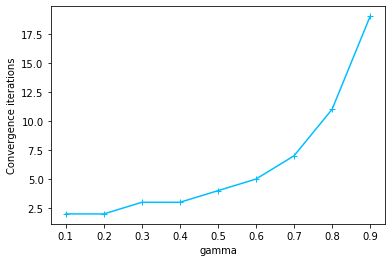

In [50]:
plot_graph(pi_gamma_list, pi_gamma_conv_iters, param_name="gamma", curve_name="Convergence iterations")

In [32]:
pi_r1_list = [10, 20, 50, 100, 10, 10, 20, 50, 100, 10]
pi_r2_list = [2, 2, 2, 3, 10, 2, 2, 2, 3, 10]
pi_p_list = [0.1, 0.1, 0.1, 0.1, 0.1, 0.01, 0.01, 0.01, 0.01, 0.01]

pi_rew_max_iteration = 30
pi_rew_gamma = 0.9
pi_rew_epsilon = 0.0001

pi_rew_conv_iters = []
pi_rew_max_value = []
pi_rew_time_run = []
pi_rew_V = []
pi_rew_States = []
pi_rew_policies = []
pi_rew_policy_update = []
pi_rew_tot_rewards = np.zeros((len(pi_r1_list), pi_rew_max_iteration))

step = 0

for i in range(len(pi_r1_list)):
    
    P, R = forest(S=S, p=pi_p_list[i], r1=pi_r1_list[i], r2=pi_r2_list[i])
    
    start_time = time.time()
    pi = run_pi(P, R, gamma=pi_rew_gamma, max_iter=pi_rew_max_iteration)
    running_time = time.time() - start_time
    
    pi_rew_conv_iters.append(pi.iter)
    pi_rew_max_value.append(pi.run_stats[-1]['Max V'])
    pi_rew_time_run.append(running_time)
    
    pi_rew_V.append(pi.V)
    stats = pi.run_stats
    vi_rew_States.append(stats)
    vi_rew_policies.append(pi.policy)
    vi_rew_policy_update.append(len(pi.run_stats))
    
    for it in range(pi.iter):
        pi_rew_tot_rewards[step, it] = pi.run_stats[it]['Mean V']
    for it in range(pi.iter, pi_rew_max_iteration):
        pi_rew_tot_rewards[step, it] = pi.run_stats[-1]['Mean V']
    
    step += 1

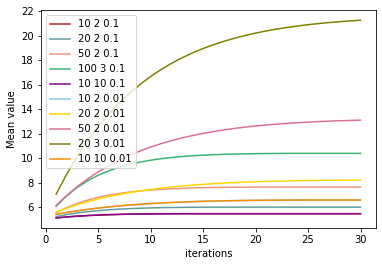

In [46]:
plot_graphs(range(1, pi_rew_max_iteration+1), pi_rew_tot_rewards, 
            ["10 2 0.1","20 2 0.1", "50 2 0.1","100 3 0.1","10 10 0.1",
             "10 2 0.01","20 2 0.01","50 2 0.01","20 3 0.01","10 10 0.01"], 
            param_name="iterations", curve_name="Mean value")

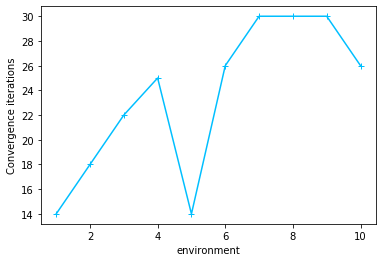

In [34]:
plot_graph(range(1, 11), pi_rew_conv_iters, param_name="environment", curve_name="Convergence iterations")